# Run agents file

In [27]:
%run agents/dqn_agent_0c.py
%run agents/ddqn_agent_0c.py
%run agents/A2C_agent_0c.py
%run agents/reinforce_agent_0c.py

In [2]:
import matplotlib.pyplot as plt

# defining a graph plotting helper method
def plot_graph(xlab, ylab, values, title, takeMean):
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.grid(True)
    # plots the mean of the next 10 rewards at every episode
    if takeMean:
        window_range = 10
        plt.plot([np.mean(values[ind-window_range: ind]) for ind in range(window_range, len(values))])
    else:
        plt.plot(values)

env_name = "Acrobot-v1"
test_runs = 5
total_episodes = 19000
epsilon_decay = 0.9998
render_while_training = False
render_while_testing = False

# DQN on CartPole-v1

In [3]:
dqn_agent1 = DQNAgent_0c(env_name)

/Users/utkarsh/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
dqn_agent1.train_agent(episodes_total=total_episodes, epsilon_decay = epsilon_decay, render = render_while_training)

Episode: 19000/19000 | Epsilon: 0.02241 | Reward: -500
Model has finished training. Use test_agent() function to test.


In [5]:
dqn_agent1.test_agent(render = render_while_testing)

Run: 0 | Reward: -500
Run: 1 | Reward: -500
Run: 2 | Reward: -500
Run: 3 | Reward: -500
Run: 4 | Reward: -500
Run: 5 | Reward: -500
Run: 6 | Reward: -500
Run: 7 | Reward: -500
Run: 8 | Reward: -500
Run: 9 | Reward: -500
Run: 10 | Reward: -500
Run: 11 | Reward: -500
Run: 12 | Reward: -500
Run: 13 | Reward: -500
Run: 14 | Reward: -500
Run: 15 | Reward: -500
Run: 16 | Reward: -500
Run: 17 | Reward: -500
Run: 18 | Reward: -500
Run: 19 | Reward: -500
Run: 20 | Reward: -500
Run: 21 | Reward: -500
Run: 22 | Reward: -500
Run: 23 | Reward: -500
Run: 24 | Reward: -500
Run: 25 | Reward: -500
Run: 26 | Reward: -500
Run: 27 | Reward: -500
Run: 28 | Reward: -500
Run: 29 | Reward: -500
Run: 30 | Reward: -500
Best Score out of 30 runs: 0


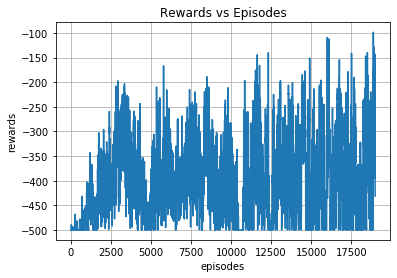

In [6]:
plot_graph("episodes", "rewards", dqn_agent1.hist_rewards, "Rewards vs Episodes", takeMean=True)


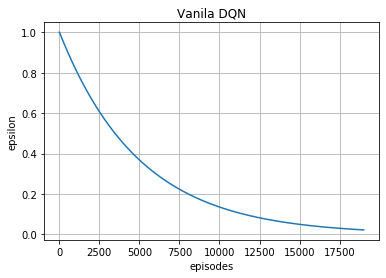

In [7]:
plot_graph("episodes", "epsilon", dqn_agent1.hist_epsilon_values, "Vanila DQN", takeMean=False)


# Double DQN on CartPole-v1

In [14]:
ddqn_agent1 = DDQNAgent_0c(env_name)

In [15]:
ddqn_agent1.train_agent(episodes_total=total_episodes, epsilon_decay = epsilon_decay, render = render_while_training)

Episode: 19000/19000 | Epsilon: 0.02241 | Reward: -500
Model has finished training. Use test_agent() function to test.


In [16]:
ddqn_agent1.test_agent(render = render_while_testing)

Run: 0 | Reward: -500
Run: 1 | Reward: -500
Run: 2 | Reward: -500
Run: 3 | Reward: -500
Run: 4 | Reward: -500
Run: 5 | Reward: -500
Run: 6 | Reward: -500
Run: 7 | Reward: -500
Run: 8 | Reward: -500
Run: 9 | Reward: -500
Run: 10 | Reward: -500
Run: 11 | Reward: -500
Run: 12 | Reward: -500
Run: 13 | Reward: -500
Run: 14 | Reward: -500
Run: 15 | Reward: -500
Run: 16 | Reward: -500
Run: 17 | Reward: -500
Run: 18 | Reward: -500
Run: 19 | Reward: -500
Run: 20 | Reward: -500
Run: 21 | Reward: -500
Run: 22 | Reward: -500
Run: 23 | Reward: -500
Run: 24 | Reward: -500
Run: 25 | Reward: -500
Run: 26 | Reward: -500
Run: 27 | Reward: -500
Run: 28 | Reward: -500
Run: 29 | Reward: -500
Run: 30 | Reward: -500
Best Score out of 30 runs: 0


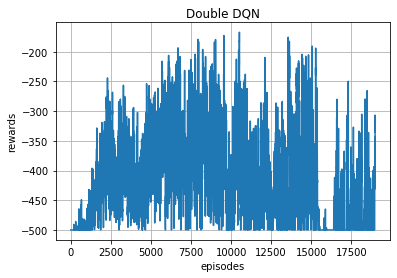

In [17]:
plot_graph("episodes", "rewards", ddqn_agent1.hist_rewards, "Double DQN", takeMean=True)


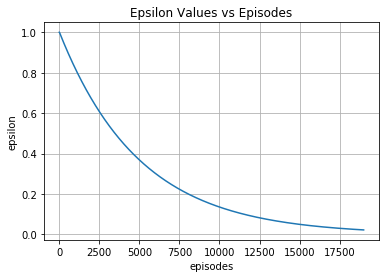

In [18]:
plot_graph("episodes", "epsilon", ddqn_agent1.hist_epsilon_values, "Epsilon Values vs Episodes", takeMean=False)


## On A2C

In [74]:
a2c_agent = A2CAgent_0c(env_name, -100)

/Users/utkarsh/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [75]:
a2c_agent.train_agent(10000)

In [76]:
a2c_agent.test_agent(test_runs)

A2C Agent's High Score on Acrobot-v1 Environment in 5 runs: -224 


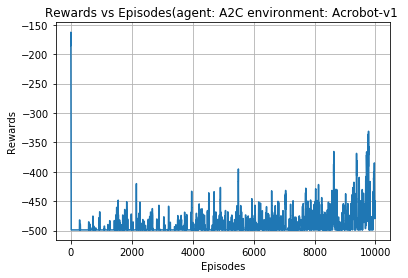

In [92]:
plot_graph("Episodes", "Rewards", a2c_agent.hist_rewards, "Rewards vs Episodes(agent: %s environment: %s "%(a2c_agent.agent_name, a2c_agent.env_name), True)


## On Reinforce

In [88]:
reinforce_agent = ReinforceAgent_0c(env_name, -250)

/Users/utkarsh/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [89]:
reinforce_agent.train_agent(10000)

REINFORCE Agent Training ended at episode 96 for Acrobot-v1 environment as agent performed best in last 10 runs


In [90]:
reinforce_agent.test_agent(test_runs)

REINFORCE Agent's High Score on Acrobot-v1 Environment in 5 runs: 0 


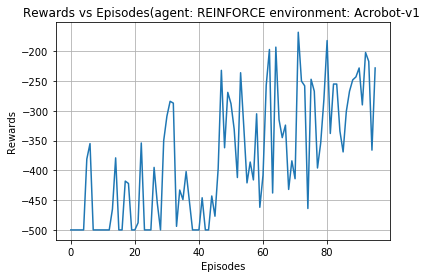

In [91]:
plot_graph("Episodes", "Rewards", reinforce_agent.hist_rewards, "Rewards vs Episodes(agent: %s environment: %s "%(reinforce_agent.agent_name, reinforce_agent.env_name),False)
